In [13]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


Universal Declaration of Human Rights 
Preamble 
Whereas recognition of the inherent dignity and of the equal and inalienable rights of all members of the human family is the foundation of freedom, justice and peace in the world,  
Whereas disregard and contempt for human rights have resulted in barbarous acts which have outraged the conscience of mankind, and the advent of a world in which human beings shall enjoy freedom of speech and belief and freedom from fear and want has been proclaimed as the highest aspiration of the common people,  
Whereas it is essential, if man is not to be compelled to have recourse, as a last resort, to rebellion against tyranny and oppression, that human rights should be protected by the rule of law,  
Whereas it is essential to promote the development of friendly relations between nations,  
Whereas the peoples of the United Nations have in the Charter reaffirmed their faith in fundamental human rights, in the dignity and worth of the human person and 

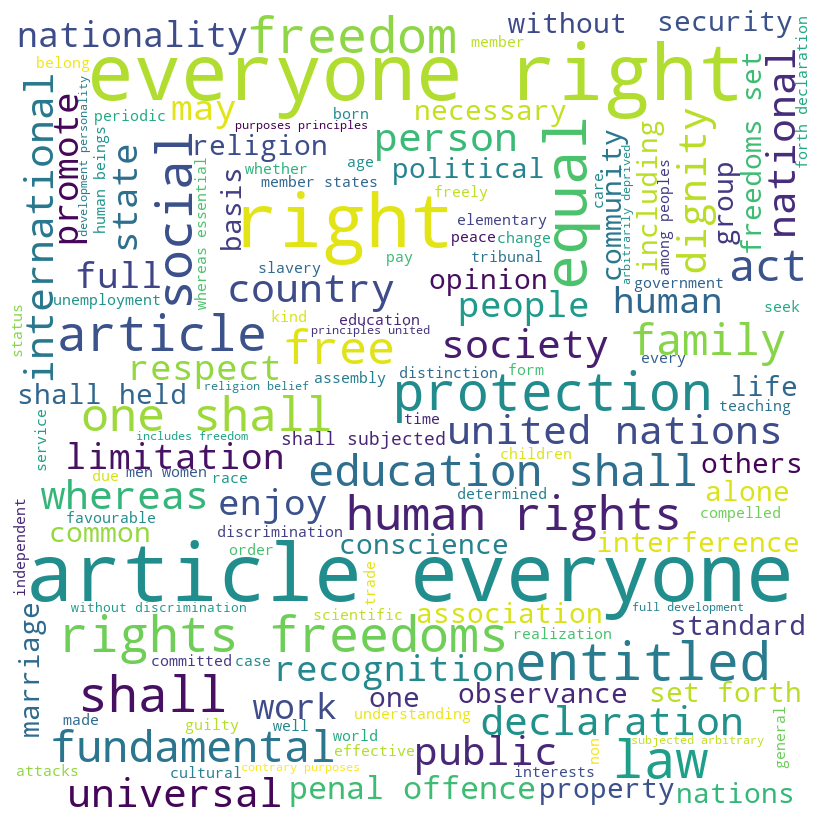

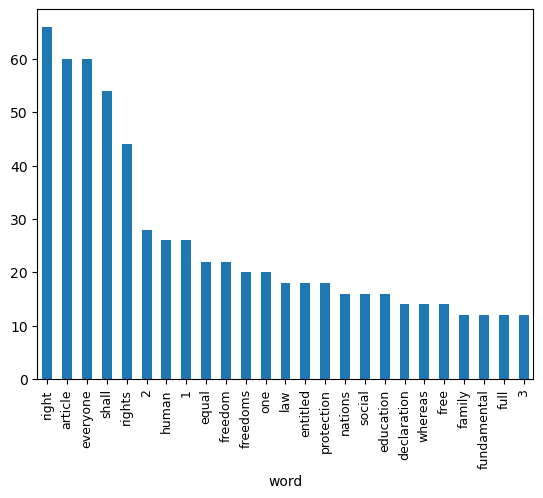

In [33]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from IPython.display import display
import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob
from operator import itemgetter

#Reading the contents of the UN declaration of Human rights
FilePath = "C:\\Users\\jines\\Downloads\\un_declaration_hr_text_data.txt"
file = open(FilePath, "r")
contents = file.read()

print(contents)

#Removing the stop words for the word cloud and bar plot
text = contents.lower()
stopWords = set(stopwords.words("english"))
tokens = word_tokenize(text)

sentenceFiltered = []
sentenceFiltered = [w for w in tokens if not w.lower() in stopWords]

for w in tokens:
    if w not in stopWords:
        sentenceFiltered.append(w)
        
#print(tokens)
print(sentenceFilered) #printing the removed words

commentWords = " ".join(sentenceFiltered) #adding spaces between the stopwords

# 2)word cloud
wordcloud = WordCloud(width=800, 
                      height=800,
                      background_color='white', 
                      stopwords=stopWords,
                      min_font_size=10).generate(commentWords) #adding certain charactersitics

# displaying the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

# 3)bar graph plot
commentWords = " ".join(sentenceFiltered)#joins the words
text = commentWords
blob = TextBlob(text)

itemList = blob.word_counts.items()#counting the words

sortedItems = sorted(itemList, key = itemgetter(1), reverse= True)

freqItems = sortedItems[0:25]#setting it to the top 25 used words in the document

df = pd.DataFrame(freqItems, columns = ["word", "count"])#naming of the a and y labels


ax = df.plot.bar(x= "word", y="count", legend= False)#plotting the dataframe labels as the x and y axis

plt.tick_params(axis="x", which ="major", labelsize = 9)#making the x-lables more spaced so they they are not clustered